In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

<h1>Questão 4</h1>

In [2]:
def trapezio (x1,x2,y1,y2):
    h = x2 - x1
    return (h/2) * (y2+y1)

In [3]:
def simpson13 (x1,x2,x3,y1,y2,y3):
    h = x3-x1/2
    return (h/3) * (y1+(4*y2)+y3)

In [4]:
def simpson38 (x1,x2,x3,x4,y1,y2,y3,y4):
    h = x4-x1/3
    return ((3*h)/8) * (y1 + 3*y2 + 3*y3 + y4)

In [5]:
x4 = np.array([0,0.5,1,1.5,48,48.5,49,59,69,79])
print(x4)

[ 0.   0.5  1.   1.5 48.  48.5 49.  59.  69.  79. ]


In [6]:
y4 = np.array([62/3.6,74/3.6,73.5/3.6,60.5/3.6,49.5/3.6,42.5/3.6,39/3.6,44.5/3.6,58/3.6,61.5/3.6])
print(f'Velocidades em m/s:\n{y4}')

Velocidades em m/s:
[17.22222222 20.55555556 20.41666667 16.80555556 13.75       11.80555556
 10.83333333 12.36111111 16.11111111 17.08333333]


Para os os tempos de 0 - 1.5 podemos fazer 3/8 de Simpson pois eles tem o mesmo passo

In [7]:
integral1 = simpson38 (x4[0],x4[1],x4[2],x4[3],y4[0],y4[1],y4[2],x4[3])
print(integral1)

79.671875


Para os os tempos de 1.5 - 48 temos que fazer por Trapézio

In [8]:
integral2 = trapezio (x4[3],x4[4],y4[3],x4[4])
print(integral2)

1506.7291666666667


Para os os tempos de 48 - 49 temos que fazer por 1/3 de Simpson

In [9]:
integral3 = simpson13 (x4[4],x4[5],x4[6],y4[4],y4[5],y4[6])
print(integral3)

598.3796296296297


Para os os tempos de 49 - 79 podemos fazer por 3/8 de Simpson

In [10]:
integral4 = simpson38 (x4[6],x4[7],x4[8],x4[9],y4[6],y4[7],y4[8],x4[9])
print(integral4)

4118.375


Comprimento total da pista:

In [16]:
comprimento = integral1+integral2+integral3+integral4
print(f'Comprimento total da Pista em metros: {comprimento}0.2fm')

Comprimento total da Pista em metros: 6303.15567129629650.2fm


<h1>Questão 3</h1> 

In [12]:
def poli_lagrange(valor,x,y):
    soma = 0
    for i in range(0,len(y)):
        produtorio1 = 1
        produtorio2 = 1
        for j in range(0,len(x)):
            if j != i:
                produtorio1 = (valor-x[j]) * produtorio1
                produtorio2 = (x[i] - x[j]) * produtorio2
        prodt = produtorio1/produtorio2
        soma += prodt*y[i]
    return soma

In [13]:
x3 = np.array([0,5,10,20,30,40])
y3 = np.array([1.787,1.519,1.307,1.002,0.7975,0.6529])

<h2>Item a)</h2>

In [14]:
T = poli_lagrange(7.5,x3,y3)
print(f'Valor de u em T=7.5 graus: {T}ºC')

Valor de u em T=7.5 graus: 1.4068632289341518ºC


<h2>Item b)</h2>

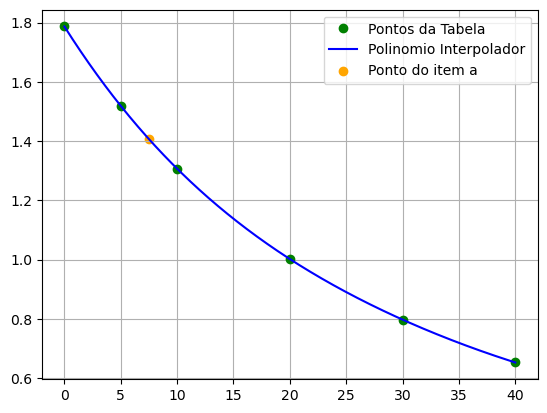

In [15]:
xx = np.linspace(x3[0],x3[-1],1000)
yy = []
for i in xx:
    yy.append(poli_lagrange(i,x3,y3))
plt.grid(True)
plt.plot(x3, y3,'o', color = 'green', label = 'Pontos da Tabela')
plt.plot(xx, yy, color = 'blue', label = 'Polinomio Interpolador')
plt.scatter(7.5, T, color = 'orange', label = 'Ponto do item a')
plt.legend()
plt.show()